### Imports

In [196]:
# Mettre ici tous les imports
import importlib
import pandas as pd
import modules.data_processing
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
## Reloading, relancer cette cell si vous modifiez les fonctions

importlib.reload(modules.data_processing)
from modules.data_processing import *

In [127]:
DATA_PATH = './data/wiki-RfA.txt'

### Preparing Data

In [128]:
wiki_df = extract_data(DATA_PATH)
process_dataframe(wiki_df)

#elections_df = create_elections_df(wiki_df) -> IF NEEDED
#users_df = create_users_df(wiki_df) -> IF NEEDED

In [129]:
wiki_df.head(10)

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,1
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1
5,Sven Manguard,BDD,1,1,2013,2013-04-20 01:53:00,'''Support''' There are plenty of important ro...,1
6,Ramaksoud2000,BDD,1,1,2013,2013-04-20 02:00:00,'''Support''' per noms. I don't see a reason n...,1
7,RockMagnetist,BDD,1,1,2013,2013-04-20 02:18:00,'''Support''' BDD already wields a broom pret...,1
8,Carrite,BDD,1,1,2013,2013-04-20 02:22:00,'''Support''' barring a completely unexpected ...,1
9,Someguy1221,BDD,1,1,2013,2013-04-20 03:09:00,'''Support''' because I see no good reason not...,1


* It is important to have an idea of the proportion of votes within our dataset.

Text(0.5, 0, 'VOT')

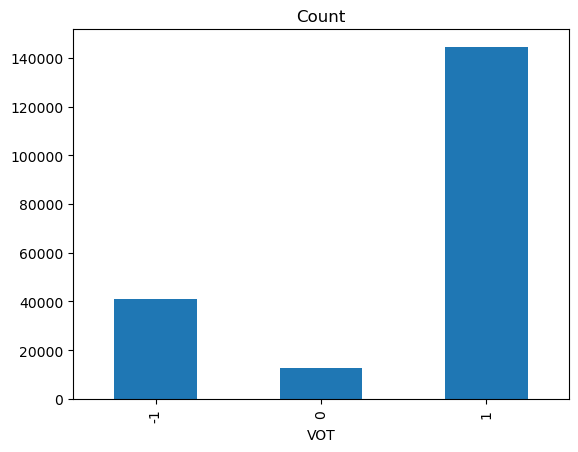

In [130]:
ax = wiki_df['VOT'].value_counts().sort_index().plot(kind='bar', title='Count')
ax.set_xlabel('VOT')

#### Text preprocessing

In [131]:
wiki_copy = wiki_df.copy()

In [132]:
#wiki_copy['TXT'].replace('', np.nan, inplace = True)
#wiki_copy['TXT'].isna().sum()

In [136]:
len(wiki_copy[wiki_copy['TXT'] == '']['TXT'])

7190

* We notice that we have 7190 missing values among comments. 

#### Removing the Wiki Markup from the comments

In [54]:
# ensure that TXT is string
wiki_copy['TXT'] = wiki_copy['TXT'].astype(str)

* We will try to use a python library called "wikitextparser" to easily remove the wiki markup. 

In [55]:
from wikitextparser import remove_markup, parse

In [137]:
example = wiki_copy.iloc[66609]['TXT']
example

"Congratulatory '''Support''' - Excellent [[Wikipedia:WikiProject Military history|WikiProject:Military history]] experience with this user. Can be trusted with new responsibility."

In [138]:
remove_markup(example)

'Congratulatory Support - Excellent WikiProject:Military history experience with this user. Can be trusted with new responsibility.'

* The library didn't handle the link removal as expected. Therefore, we will implement a classic function using regular expressions to remove the wiki markup, relying on the Wikitext structure from the website [Wikitext](https://en.wikipedia.org/wiki/Help:Wikitext).

In [139]:
from modules.text_processing import *
importlib.reload(modules.text_processing)

remove_wiki_markup(example)

'Congratulatory Support - Excellent  experience with this user. Can be trusted with new responsibility.'

* The results is indeed what we want. Let's test on a random sample of comments.

In [140]:
txts = wiki_copy['TXT'].sample(10).copy()
for i, comment in enumerate(txts): 
    print(i, ' : ' , comment)
    print() 

0  :  '''Oppose''' like the person said above, didn't answer the questions in a manner that was good enough for me. also the vandalism is worrying to me, really wasn't that long enough ago. if you are serious about becoming an admin and taking on what that requires my i suggest creating a new account and starting from scratch? would remove the bad memories people could have of your previous edits. and would show only the good side of yourself, or at least i'd hope so.

1  :  '''Support'''. I haven't seen anything to give me concern, or even a pause. Cheers. &mdash;

2  :  At the last RfA I opposed this editor. However, I have reviewed her recent interactions with other users and now find no reason to oppose. I find her posts to talk pages to be kind, professional and firm. To date, most of the opposes and neutrals are expressing soft opposition or weak neutrality which suggests that much has improved. There is little downside to this nomination so I am happy to support. -

3  :  '''Sup

In [141]:
from modules.text_processing import *
importlib.reload(modules.text_processing)

for i, comment in enumerate(txts): 
    print(i, ' : ' , remove_wiki_markup(comment))
    print() 

0  :  Oppose like the person said above, didn't answer the questions in a manner that was good enough for me. also the vandalism is worrying to me, really wasn't that long enough ago. if you are serious about becoming an admin and taking on what that requires my i suggest creating a new account and starting from scratch? would remove the bad memories people could have of your previous edits. and would show only the good side of yourself, or at least i'd hope so.

1  :  Support. I haven't seen anything to give me concern, or even a pause. Cheers. 

2  :  At the last RfA I opposed this editor. However, I have reviewed her recent interactions with other users and now find no reason to oppose. I find her posts to talk pages to be kind, professional and firm. To date, most of the opposes and neutrals are expressing soft opposition or weak neutrality which suggests that much has improved. There is little downside to this nomination so I am happy to support. -

3  :  Support - I have had good

* It seems that it works well on the comments of our dataset. We create then a column for cleaned comments.

In [176]:
wiki_copy['CLE'] = wiki_copy['TXT'].apply(remove_wiki_markup)
wiki_copy.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1,Support as nominator.
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,1,Support per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,"Support, with great pleasure. I work with BDD ..."


In [177]:
comments_with_one_char = wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 1)]['CLE'].unique() # one char in the comments
comments_with_one_char

array([' ', '—', '-', '+', '→', "'", '.', '}', '!', '–', 'S', '·', 'I',
       '~', '«', '↔', 'C', ':', '(', '"', '/'], dtype=object)

In [178]:
comments_with_two_char = wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 2)]['CLE'].unique() # two char in the comments
comments_with_two_char

array(['  ', '- ', '+ ', '— ', '←.', ' [', '. ', "''", ' (', '⇦⇨', ' —',
       'OK', '}—', ' -', "':", '我是', '++', 'CO', ' /', ' ~', ' C', 'Q8',
       ' ☺', 'No', 'Da', 'S.', '! ', ':)'], dtype=object)

* We will delete those comments containing one or characters that are meaningless for our study.

In [179]:
wiki_copy['CLE'] = wiki_copy['CLE'].apply(lambda x: '' if len(x) < 3 and x not in ['OK', 'No']  else x)

In [180]:
wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 3)]['CLE'].unique()

array(['!!!', "'''", ' - ', 'Ja.', 'OK.', "I'm", 'Yes', '.  ', " ''",
       '+1–', '賛成 ', '} —', '他是好', 'wow', '  ~', "'' ", ' ~~', 'No ',
       '^.^', 'S+1', "''÷", 'yup', '➲  ', 'Yay', 'Q3.', '  (', '   ',
       'yes', '-  ', 'Yup', 'Aye', 'Q1.', '9 (', '...', 'No.', 'Yep',
       '— (', '. —', "—''", ' :)', ' (/', ' (|', 'yep', '  |', '}} ',
       'Baa', 'Moo', 'Ok.', '!  ', "— '", '. -', ':) ', 's  ', ". '",
       ' ;)', 'Yo.', ' ()', ' ("', ':-)', 'NO.'], dtype=object)

In [181]:
wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 4)]['CLE'].unique()

array(['. - ', 'Yay.', "'''/", "—'''", 'Q2 -', 'Sure', 'Yup.', 'Wow.',
       " - '", 'Yes.', 'Duh.', 'Oui ', 'Yeps', 'Yes!', 'Yep.', '. ? ',
       " '''", 'Oui.', 'jo  ', '+1  ', 'Yes ', 'Yep!', ' .  ', 'See ',
       '. ~~', 'NEWT', '  (|', 'AGF ', 'FGJ–', 'yup.', 'Yep ', '➨ ❝❞',
       'Duh!', '-   ', '   ·', 'DUH!', 'Aye.', 'Meh.', ". ''", "! ''",
       'Nom.', ' ...', "Q5 '", 'okay', 'Aww.', 'Yup ', 'I am', 'Yea.',
       "~'''", 'Pig.', 'Yo. ', 'Mop.', 'Wow!', "''' ", '100%', 'Yes,',
       "I'm ", 'No. ', 'Bleh', "'''〈", '   (', 'Да! ', 'Yay!', '.  |',
       ' ( -', '«»(|', ', . ', 'TAK!', '<3  ', '.   ', 'yes!', 'Moo.',
       'Cool', 'Hai ', 'Pro.', 'Sup ', 'YES!', 'Ja! ', ' ort', 'yep.',
       'Who?', 'Yup,', 'No  ', 'Heh.'], dtype=object)

In [182]:
wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 5)]['CLE'].unique()

array(['100%.', "← '''", "  '''", 'Yes! ', 'Q2. -', 'Aye.—', ". '''",
       'Sure.', 'nods ', 'Meh -', 'Yerp.', " -'''", 'Uhhhh', 'Per .',
       'Sold.', "'''••", 'Duh →', 'Sure ', 'sure ', 'Solid', "Yep '",
       'AGF  ', 'Okay.', 'Fine.', '    ·', 'Yup. ', 'Yes. ', 'Yup  ',
       'Yes  ', 'No.  ', " –'''", 'Yes —', 'Damn,', 'Nom  ', "''' |",
       'Desu.', 'Yep. ', '.   (', 'Aye. ', 'Ok. —', '+S . ', '+S  (',
       ' () (', "➔ '''", 'ok. —', '+1.  ', 'Yup! ', 'Duh. ', 'PRO -',
       "➨ '''", " —'''", "—'''[", 'yes. ', 'Moo  ', 'AGF. ', 'Oops.',
       'Hut+!', 'See .', 'Yeap ', 'GL. –', ' ..  ', ' ⁿɡ͡b', 'Cool.',
       'Fish.', "Sure'", 'Yes..', 'Yup..', 'Oui!.', "'''  ", ". —''",
       'Sure!', 'Yay. ', ".  ''", 'Duh .', 'Gasp!', 'Mooo.', 'Agree',
       'Yeah.', 'Sì.  ', 'TINC.', 'Frog.', 'w00t.', 'SNFA.', 'Aye =',
       'Duh  ', 'Okay!', 'Duh -', 'What?', 'AOL!>', 'No ()', 'Ok.  ',
       'Sí.  ', 'Yep  ', 'Mhmm.', 'Da.  ', '-"-  ', 'No. -'], dtype=object)

When examining comments with a length greater than 2, we find various words and special characters that we cannot eliminate at this point. 
Due to the extensive number of words and special characters, exhaustive treatment of these comments becomes challenging. 

* Let's see then what are the words by which comments start.

In [195]:
from collections import defaultdict
cleaned_comments = wiki_copy['CLE']

first_word_counts = defaultdict(int)
for comment in cleaned_comments: 
    if isinstance(comment, str) and comment.strip(): 
        first_word = comment.split()[0]
        first_word_counts[first_word] += 1
i = 0       
for word, count in first_word_counts.items(): 
    print(word, ', Occurrence :', count)
    if i == 15: 
        break
    i += 1


Support , Occurrence : 68944
Support, , Occurrence : 7582
Yea, , Occurrence : 6
Support. , Occurrence : 23897
If , Occurrence : 108
Weak , Occurrence : 3370
Support: , Occurrence : 1661
. , Occurrence : 160
Support...opposes , Occurrence : 1
Oppose. , Occurrence : 5538
Although , Occurrence : 68
Oppose , Occurrence : 21033
Fruitless , Occurrence : 3
Neutral , Occurrence : 5864
Yes , Occurrence : 153
Strong , Occurrence : 8393


In [183]:
# Some comments have become empty
# After the wiki markup removal
# wiki_copy['CLE'].replace('', np.nan, inplace=True)
# wiki_copy['CLE'].isna().sum()
len(wiki_copy[wiki_copy['CLE'] == '']['CLE'])

9035

* In the cleaned comments, we have now 9035 missing values compared to the initial count of 7190. 

We don't do the replacement at this stage of empty comments by NaN, because we intend to maintain them as strings for the following steps. 

# Sentiment analysis with vader 

In [164]:
# Si Chris et Liandro en ont besoin 


# To remove all punctuation 
# import string 
# translator = str.maketrans("", "", string.punctuation)
# wiki_no_punct = wiki_df.copy()
# wiki_no_punct['CLE'] = wiki_no_punct['CLE'].apply(lambda x: x.translate(translator) if isinstance(x, str) else x)

Punctuation can provide valuable context for sentiment analysis as it can affect the affect the emotional ton of a sentence. Vader is designed to work with text that includes punctuation. It take into account various linguistic and grammatical aspects to understant the sentiment expressed in a piece of text.

In [185]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sakas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [186]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

* Let's apply it on an example comment.

In [215]:
ex = wiki_copy.iloc[5]['CLE']
print(ex)
print('Scores = ', sia.polarity_scores(ex))

Support There are plenty of important roles on this project, of which content creator is only one of them. BDD has done good work over a number of years. That his primary activity is not content creation is not of concern.
Scores =  {'neg': 0.04, 'neu': 0.769, 'pos': 0.191, 'compound': 0.7083}


VADER sentiment analysis provides sentiment scores for text: negative(neg), neutral(neu), positive(pos) and compound scores. The compound score takes values from -1 to 1, with values closer to -1 indicating negativity, 0 for neutrality and 1 for positivity. 

In [187]:
scores = {}
for i, row in wiki_copy.iterrows(): 
    scores[i] = sia.polarity_scores(row['CLE'])

In [188]:
scores_df = pd.DataFrame(scores).T

In [189]:
scores_df.head(10)

,neg,neu,pos,compound
0,0.000,0.426,0.574,0.4019
1,0.000,0.426,0.574,0.4019
2,0.000,0.426,0.574,0.4019
3,0.176,0.504,0.320,0.6124
4,0.000,0.612,0.388,0.9349
5,0.040,0.769,0.191,0.7083
6,0.000,0.722,0.278,0.4019
7,0.022,0.848,0.130,0.8850
8,0.058,0.665,0.278,0.9801
9,0.172,0.391,0.437,0.5267


In [201]:
# Merging the two dataframes
wiki_with_scores = pd.concat([scores_df, wiki_copy], axis = 1)
wiki_with_scores.sample(10)

,neg,neu,pos,compound,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
113954,0.104,0.732,0.165,0.2500,Runcorn,David.Mestel,1,0,2007,2007-01-16 22:28:00,'''Support''' I am very familiar with David's ...,1838,Support I am very familiar with David's work a...
40740,0.000,1.000,0.000,0.0000,Majorly,Paxse,1,1,2009,2009-03-29 16:44:00,''',562,'''
127884,0.107,0.496,0.396,0.7901,HereToHelp,Aude,1,1,2006,2006-02-15 21:40:00,'''Support'''. A pleasure to work with and a v...,2216,Support. A pleasure to work with and a valued ...
28740,0.134,0.619,0.247,0.1655,Ret.Prof,Frozen4322,1,0,2010,2010-02-13 10:46:00,'''Weak Support:''' I like what I see but the...,379,Weak Support: I like what I see but the exper...
197436,0.259,0.741,0.000,-0.1027,Ta bu shi da yu,Netoholic,-1,0,2004,2004-11-03 00:50:00,Reluctantly oppose. He's too abrasive. -,3848,Reluctantly oppose. He's too abrasive. -
136127,0.000,0.859,0.141,0.7834,Ashibaka,Haukurth,0,1,2006,2006-01-17 02:24:00,'''Neutral''' Per previous RfA and Ghirla's co...,2319,"Neutral Per previous RfA and Ghirla's comment,..."
168425,0.197,0.725,0.078,-0.9852,Mets501,Sugarpine,-1,0,2006,2006-09-21 01:37:00,"'''Strong oppose''' - several positives, but w...",2932,"Strong oppose - several positives, but way to ..."
52317,0.092,0.773,0.135,0.6209,Keegan,Teratornis,1,0,2009,2009-03-27 04:37:00,Part of the joy of the communal aspect of this...,772,Part of the joy of the communal aspect of this...
173306,0.000,0.410,0.590,0.7351,Exir Kamalabadi,Canderson7,1,1,2005,NaT,'''Support''' Another person that is a good va...,3061,Support Another person that is a good vandal f...
158862,0.000,0.000,0.000,0.0000,NaN,Folajimi2,0,0,2006,NaT,,2688,


In [203]:
wiki_with_scores['CLE'].replace('', np.nan, inplace=True) 
wiki_with_scores['CLE'].isnull().sum()

9035

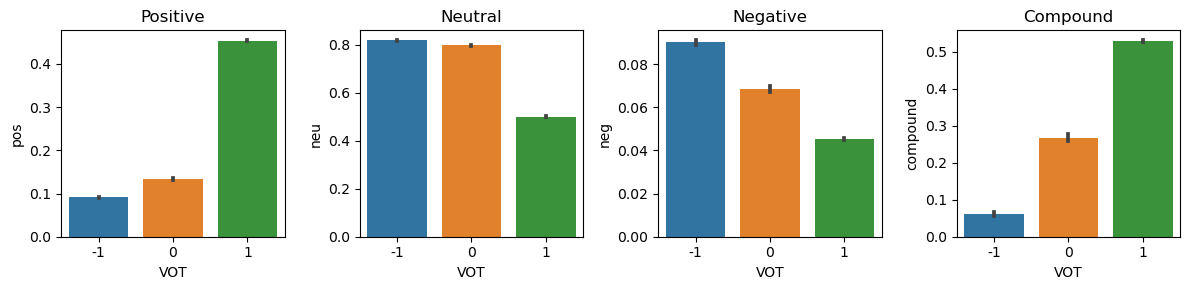

In [206]:
wiki_cle_dropna = wiki_with_scores.dropna(subset = 'CLE') # remove empty comments 
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=wiki_cle_dropna, x='VOT', y='pos', ax=axs[0])
sns.barplot(data=wiki_cle_dropna, x='VOT', y='neu', ax=axs[1])
sns.barplot(data=wiki_cle_dropna, x='VOT', y='neg', ax=axs[2])
sns.barplot(data=wiki_cle_dropna, x='VOT', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

On average, we can conclude that there is consistency between the votes and the associated comments.

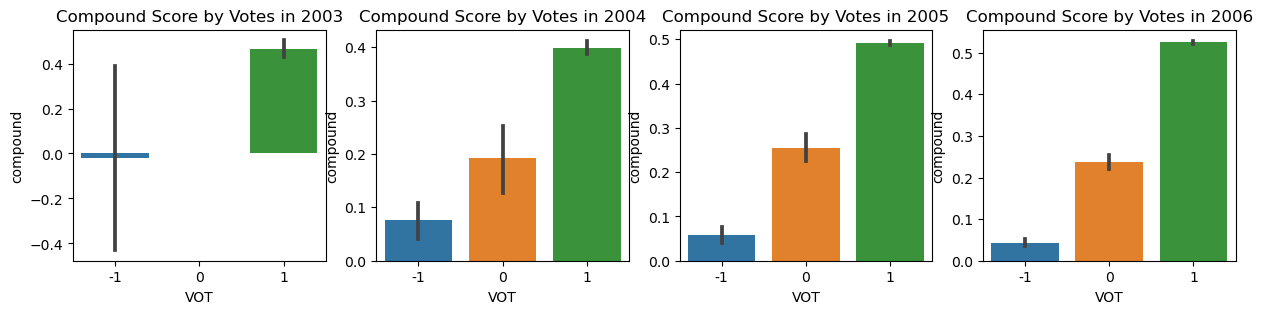

In [207]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
year = 2003 
for i in range(4):
    axs[i] = sns.barplot(data=wiki_cle_dropna[wiki_cle_dropna['YEA'] == year], x='VOT', y='compound', ax= axs[i])
    axs[i].set_title('Compound Score by Votes in ' + str(year))
    year += 1

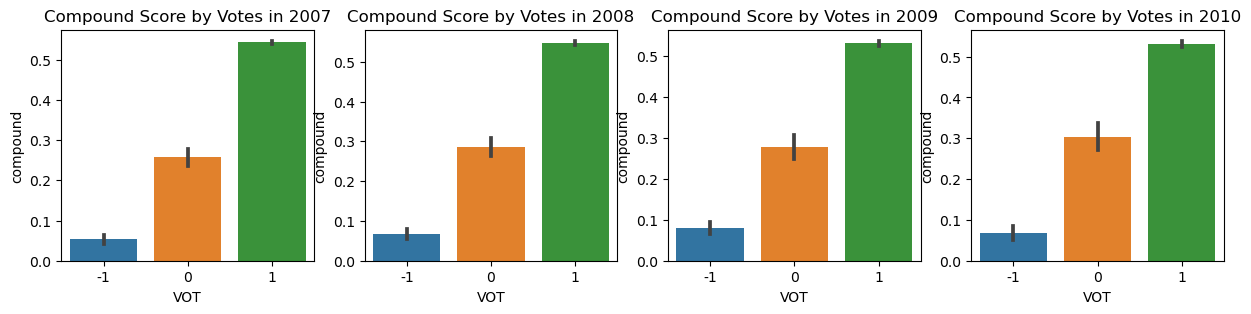

In [208]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
year = 2007 
for i in range(4):
    axs[i] = sns.barplot(data=wiki_cle_dropna[wiki_cle_dropna['YEA'] == year], x='VOT', y='compound', ax= axs[i])
    axs[i].set_title('Compound Score by Votes in ' + str(year))
    year += 1

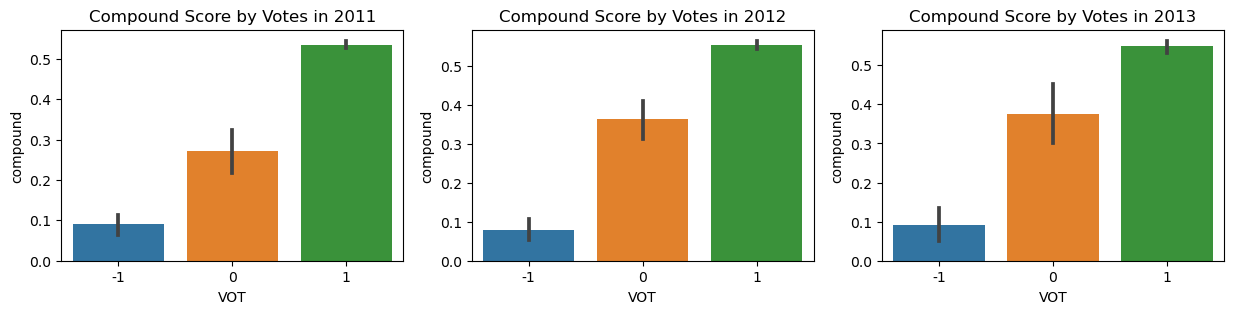

In [209]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
year = 2011 
for i in range(3):
    axs[i] = sns.barplot(data=wiki_cle_dropna[wiki_cle_dropna['YEA'] == year], x='VOT', y='compound', ax= axs[i])
    axs[i].set_title('Compound Score by Votes in ' + str(year))
    year += 1

* For each year, the conclusion of consistency is still available. Therefore, generally, people tend to leave comments accordingly to their vote choice.